# Author: Sejal Pol

### Objective : In this regression task we will predict the optimum number of clusters and represent it visually for the given ‘Iris’ dataset.

## Importing required libraries

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [156]:
#Importing dataset
data = pd.read_csv('C:/Users/SEJAL POL/Desktop/Iris.csv')
print("Data has been succesfully imported!")
data.head()

Data has been succesfully imported!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [158]:
data.shape

(150, 6)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [191]:
data.drop(['Id'],axis=1).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [161]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### NO NULL values in the dataset

### Pairplot of dataset

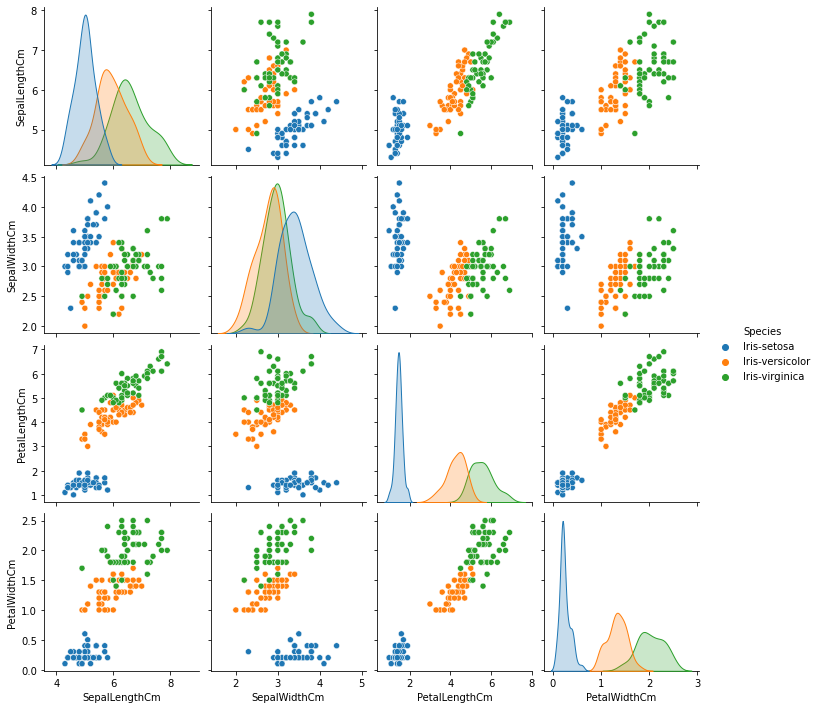

In [196]:
import seaborn as sns
sns.pairplot(data.drop(['Id'],axis=1), hue ='Species')

### Q. How do you find the optimum number of clusters for K Means? How does one determine the value of K?

**Ans**. There is a popular method known as **Elbow Method** which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster.

In [184]:
#WCSS(Within Cluster Sum of Squares) value for K clusters
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986,
 25.955497086247092]

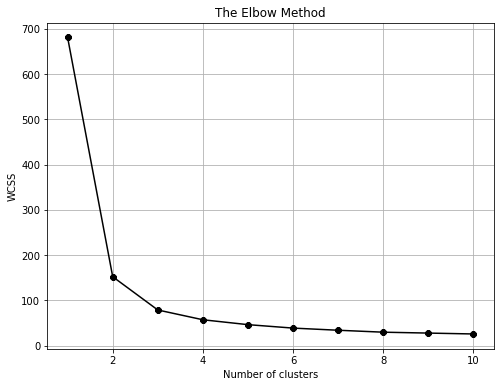

In [165]:
#The Elbow Method
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,color='Black',marker='8',markerfacecolor='black')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.grid()
plt.show()

### As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

**Clustering**

In [162]:
x=pd.DataFrame(data.iloc[:,1:5].values, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Model Training

### Implement k-means clustering using k=3

In [166]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [167]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [168]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Cluster Visualization 

**Finally, its time to visualize the three clusters that were formed with the optimal k value.**

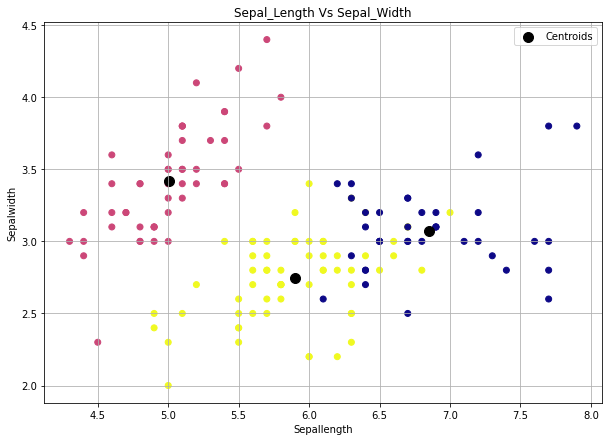

In [178]:
#Visualizing Sepal_Length Vs Sepal_Width 
plt.figure(figsize=(10,7))
plt.scatter( x.iloc[:,0 ], x.iloc[:,1], c=y_kmeans, marker='o',cmap='plasma')
plt.title('Sepal_Length Vs Sepal_Width')
plt.xlabel('Sepallength')
plt.ylabel('Sepalwidth')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', marker='o',label = 'Centroids')
plt.grid()
plt.legend()

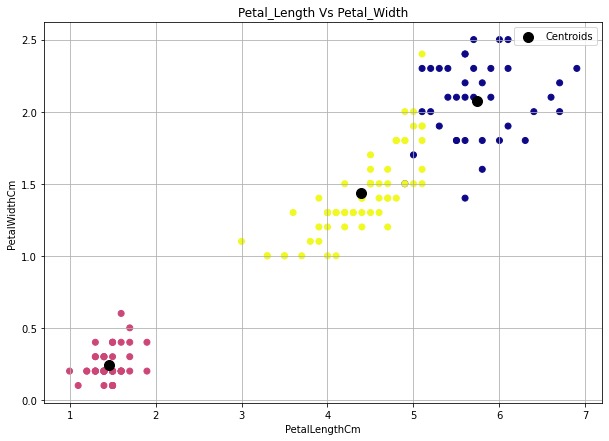

In [183]:
#Visualizing Petal_Length Vs Petal_Width 
plt.figure(figsize=(10,7))
plt.scatter( x.iloc[:,2 ], x.iloc[:,3], c=y_kmeans, marker='o',cmap='plasma')
plt.title('Petal_Length Vs Petal_Width')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'black', marker='o',label = 'Centroids')
plt.grid()
plt.legend()

## Thank you!!